In [ ]:
#用CNN提取特征检测图片相似度

In [1]:
import random
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

D:\sgmuserprofile\sv95wg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from os.path import join
import os.path
import pandas as pd
import scipy.stats

In [2]:
import cv2 as cv
IMAGE_SIZE=48

In [4]:
#加载与训练的VGG模型
path='D:\\sgmuserprofile\\sv95wg\\AppData\\Local\\Continuum\\anaconda3\\Lib\\site-packages\\tensorflow\\contrib\\keras\\api\\keras\\applications\\vgg16\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
model_vgg = VGG16(include_top=False, weights=path,input_shape=(48,48,3))

In [5]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [10]:
#加载一张图片
folder_path="D:\\06_Share\\JJJ-PATAC\\BIW"

In [11]:
#加载一个文件夹下所有文件
pic_list=[]
pic_path_list=[]
pic_name_list=[]
for pic in os.listdir(folder_path):
    pic_full_path=os.path.join(folder_path,pic)
    pic_path_list.append(pic_full_path)
    pic_name_list.append(pic)
    img=cv.imread(pic_full_path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    pic_list.append(img)
print('read count',len(pic_list))

read count 75


In [13]:
cv.imshow('x',pic_list[0])
cv.waitKey(0)

-1

In [104]:
#去掉某种颜色
test_pic=pic_list[]

In [105]:
pic=test_pic

In [94]:
def remove_color(pic,remove_list):
    
    for c in remove_list:
        
        if c=='r':
            index3=0
        elif c=='g':
            index3=1
        elif c=='b':
            index3=2
                    
        index1=0

        for dim1 in pic[index1]:
            index2=0
            for dim2 in pic[index2]:
                print(index1,index2)
                #如果是白色 255，255，255则跳过
                if np.array_equal(pic[index1][index2],[255,255,255])==True:
                    continue
                pic[index1][index2][index3]=0

                index2+=1
            index1+=1
            
    return pic

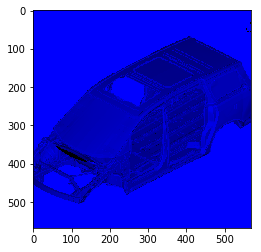

In [106]:
plt.imshow(pic)

In [110]:
def remove_color2(pic,index3):
    index1=0
    for dim1 in pic[index1]:
        index2=0
        for dim2 in pic[index2]:
    #         print(index1,index2)
            #如果是白色 255，255，255则跳过
    #         if np.array_equal(pic[index1][index2],[255,255,255])==True:
    #             continue
            pic[index1][index2][index3]=0

            index2+=1
        index1+=1
    return pic

In [101]:
index1=0
for dim1 in pic[index1]:
    index2=0
    for dim2 in pic[index2]:
#         print(index1,index2)
        #如果是白色 255，255，255则跳过
        if np.array_equal(pic[index1][index2],[255,255,255])==True:
            continue
        pic[index1][index2][index3]=0

        index2+=1
    index1+=1

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0


7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0


11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0
11 0


14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0
14 0


18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0
18 0


22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0


26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0


30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0


33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0


37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0


40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
40 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0


43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
43 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0


47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
47 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0


51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
51 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0


KeyboardInterrupt: 

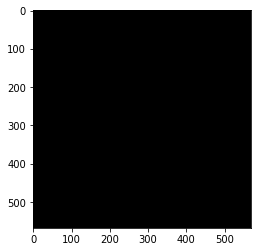

In [119]:
pic=pic_list[55]
plt.imshow(pic)
#用30来做测试

In [111]:
#分别去除3个通道
piclist=[pic]
for i in range(3):
    pic2=remove_color2(pic,i)
    piclist.append(pic2)

In [116]:
len(piclist)

4

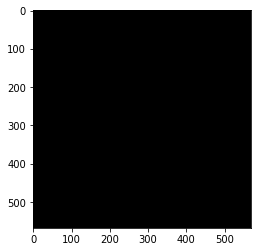

In [113]:
plt.imshow(pic)

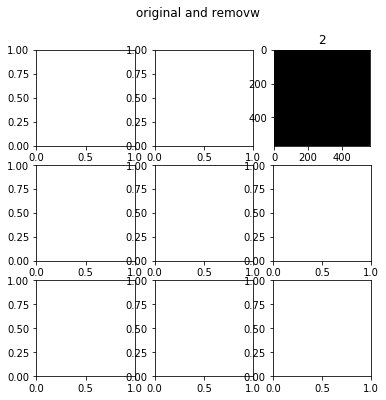

In [112]:
fig,ax=plt.subplots(3,3,figsize=(6,6))
fig.suptitle('original and removw')
ax=ax.flatten()
for pic in piclist:
    
    ax[i].imshow(pic)
    ax[i].set_title(i)

In [ ]:
pic2=remove(pic,1)

In [70]:
index1,index2

(568, 568)

In [93]:
np.array_equal(pic[0][0],[255,255,255])

True

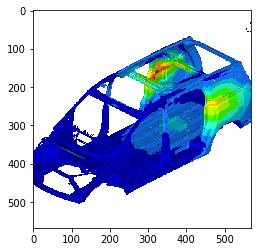

In [98]:
plt.imshow(pic1)

In [95]:
#展示图片去掉各种颜色以后


testlist=[
    ['r'],
    ['g'],
    ['b'],
    ['r','g'],
    ['r','b'],
    ['g','b']
]

pic_newlist=[]
pic_newlist.append(pic)
for to_remove in testlist:
    pic_after=remove_color(pic,to_remove)
    pic_newlist.append(pic_after)

    
fig,ax=plt.subplots(3,3,figsize=(6,6))
fig.suptitle('original and removw')
ax=ax.flatten()
for pic in pic_newlist:
    
    ax[i].imshow(pic)
    ax[i].set_title(i)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0


8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0


11 0
11 0
11 0
11 0
11 0
11 0
11 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0
12 0


15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
15 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0
16 0


19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0
19 0


22 0
22 0
22 0
22 0
22 0
22 0
22 0
22 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0
23 0


26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0
26 0


30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0


33 0
33 0
33 0
33 0
33 0
33 0
33 0
33 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0
34 0


37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0
37 0


41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0
41 0


44 0
44 0
44 0
44 0
44 0
44 0
44 0
44 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0
45 0


48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0
48 0


52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0
52 0


56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0
56 0


60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0
60 0


63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
63 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0
64 0


67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
67 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0
68 0


71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
71 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0
72 0


75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0
75 0


79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0
79 0


83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0
83 0


87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0
87 0


90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
90 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0
91 0


94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
94 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0
95 0


98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
98 0
99 0
99 0
99 0
99 0
99 0
99 0
99 0
99 0
99 0


101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 0
101 

103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
103 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 0
104 

106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 0
106 

109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 0
109 

111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
111 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 0
112 

114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 0
114 

117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 0
117 

119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
119 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 0
120 

122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 0
122 

125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
125 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 0
126 

128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 0
128 

132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 0
132 

135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 0
135 

138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 0
138 

141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 0
141 

144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 0
144 

146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 0
146 

149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 0
149 

152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 0
152 

155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 0
155 

158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 0
158 

161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 0
161 

163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
163 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 0
164 

166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 0
166 

170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 0
170 

173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 0
173 

176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 0
176 

179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 0
179 

182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 0
182 

184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
184 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 0
185 

187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
187 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 0
188 

190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 0
190 

193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 0
193 

196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 0
196 

198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
198 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 0
199 

201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 0
201 

KeyboardInterrupt: 

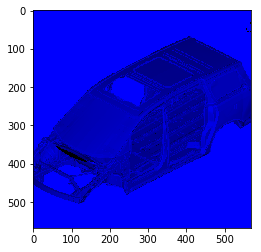

In [48]:
plt.imshow(pic)

IndexError: list index out of range

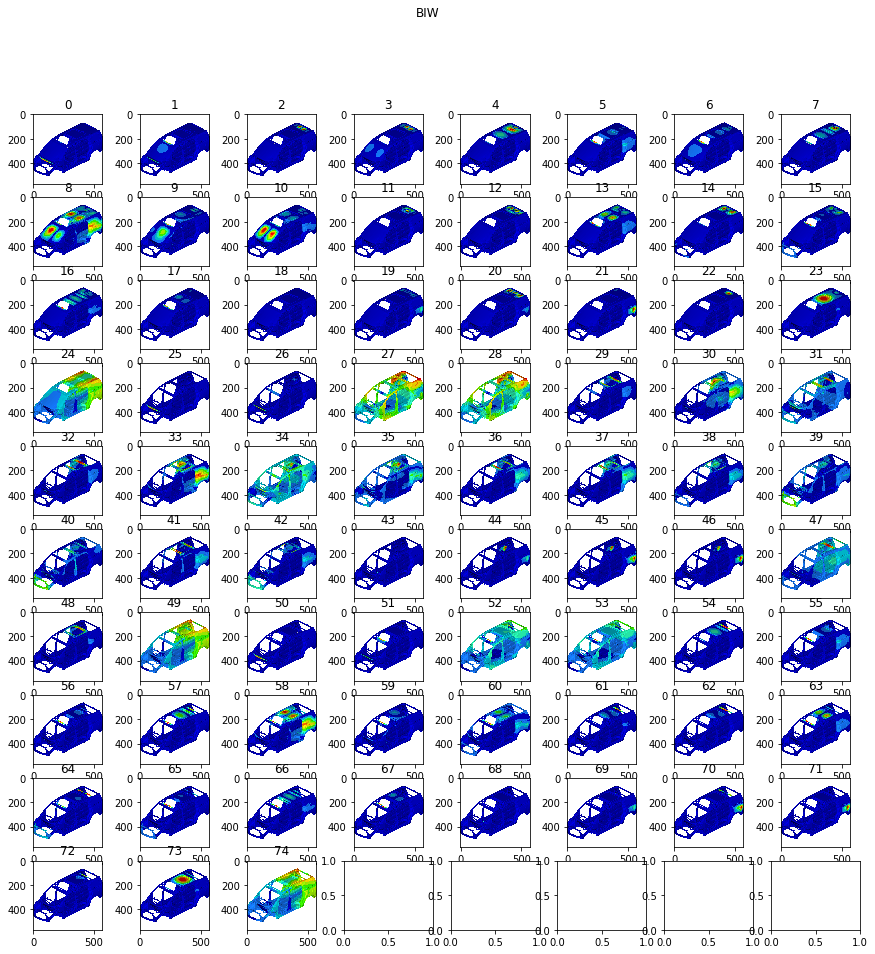

In [20]:
#展示一下读取的文件
Nr=10
Nc=8
# figsize=(15,15)
fig,ax=plt.subplots(Nr,Nc,figsize=(15,15))
fig.suptitle('BIW')
ax=ax.flatten()

for i in range(Nr*Nc):
    
    ax[i].imshow(pic_list[i])
    ax[i].set_title(i)

# 使用神经网络来提取特征，然后求相似度

# 相似度函数

In [29]:
#余弦相似度
def sim_cos(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

def sim_pearson(a,b):
    return scipy.stats.pearsonr(a,b)

In [30]:
#测试一下
cos_sim(pic_list[0].reshape(967872),pic_list[].reshape(967872))

SyntaxError: invalid syntax (<ipython-input-30-645914bde917>, line 2)

In [6]:
#转换图片格式的
def load_pic(image):
#     image=cv.imread(image_path)
    #按照keras后台要求调整数据输入格式
    if K.image_dim_ordering()=='th' and image.shape != (1, 3,IMAGE_SIZE, IMAGE_SIZE):
        image=cv.resize(image,(IMAGE_SIZE,IMAGE_SIZE))  #输入图片和训练集一致
        image=image.reshape((1,3,IMAGE_SIZE,IMAGE_SIZE))

    elif K.image_dim_ordering()=='tf' and image.shape != (1,IMAGE_SIZE, IMAGE_SIZE,3):
        image=cv.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
        image=image.reshape((1,IMAGE_SIZE,IMAGE_SIZE,3,))
    
    return image

In [7]:
image

NameError: name 'image' is not defined

In [32]:
#用vgg16取特征
pic_after_vgg_list=[]

for pic in pic_list:
    
    img=load_pic(pic)
    #使用vgg模型输出 512维度的数据
    pic_after_vgg=model_vgg.predict(img)
    pic_after_vgg_list.append(pic_after_vgg)
print(len(pic_after_vgg_list))

75


In [39]:
pic_after_vgg_list[1]

array([[[[  1.4812171 ,   0.        ,   0.        ,   0.        ,
            0.        ,   4.53978   ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   6.941345  ,  33.714035  ,
           30.124817  ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
           53.800682  ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,  34.73114   ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,  68.670265  ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
          

In [33]:
#形成相似度的矩阵,这里计算两种
sim_cos_matrix=pd.DataFrame(columns=[n for n in range(len(pic_after_vgg_list))])
sim_cos_matrix[0]=[0 for n in range(len(pic_after_vgg_list))]

sim_pearson_matrix=pd.DataFrame(columns=[n for n in range(len(pic_after_vgg_list))])
sim_pearson_matrix[0]=[0 for n in range(len(pic_after_vgg_list))]

In [36]:
#计算一下两种相似度矩阵
for i in range(len(pic_after_vgg_list)):
    for r in range(len(pic_after_vgg_list)):
        sim=sim_cos(pic_after_vgg_list[i],pic_after_vgg_list[r])
        print(i,r,
              sim)
        sim_cos_matrix.loc[i,r]=sim
        

for i in range(len(pic_after_vgg_list)):
    for r in range(len(pic_after_vgg_list)):
        
        sim=sim_pearson(pic_after_vgg_list[i].reshape(512),pic_after_vgg_list[r].reshape(512))
        print(i,r,sim)
        sim_pearson_matrix.loc[i,r]=sim[0]

0 0 1.0
0 1 0.96804381927117
0 2 0.9960750237949767
0 3 0.9540682424509648
0 4 0.9738963902926345
0 5 0.9610376606596813
0 6 0.9499004471030155
0 7 0.9756217654587882
0 8 0.81968454367972
0 9 0.8688466453196202
0 10 0.9028281355267405
0 11 0.992969265648458
0 12 0.9953855017051617
0 13 0.9630023889906187
0 14 0.9915375196134197
0 15 0.9782913970968166
0 16 0.9508406992618884
0 17 0.9966852549766195
0 18 0.9987455271145316
0 19 0.9851977772165698
0 20 0.9901878132344049
0 21 0.9776840040568802
0 22 0.9954036801028924
0 23 0.9634246724271633
0 24 0.7772507513232467
0 25 0.8520422930680038
0 26 0.8543835907737481
0 27 0.760667953123157
0 28 0.7537115823534444
0 29 0.8653188713179275
0 30 0.8019350543867676
0 31 0.8135481039690386
0 32 0.8515888466281025
0 33 0.8232913774538593
0 34 0.7701179920955229
0 35 0.8134123992212772
0 36 0.8443078462892076
0 37 0.8375197190519541
0 38 0.8460917688602287
0 39 0.8416464851344467
0 40 0.8637837125292342
0 41 0.7915595055520722
0 42 0.8730553356464961

5 8 0.8320004141168669
5 9 0.8947986239569248
5 10 0.9107052339241202
5 11 0.9696147830905872
5 12 0.964744531789463
5 13 0.9738309681623365
5 14 0.9647974636644608
5 15 0.9663651772043048
5 16 0.9916859654057212
5 17 0.9648282572056703
5 18 0.9598205888190476
5 19 0.9608051156045713
5 20 0.9688727835671664
5 21 0.9499965073757083
5 22 0.9650457504184489
5 23 0.9473970242226013
5 24 0.8069854539579515
5 25 0.8345756859907436
5 26 0.8421236569420012
5 27 0.7896272964542619
5 28 0.7869870251065763
5 29 0.876783812173529
5 30 0.8238647510149334
5 31 0.8781809723108099
5 32 0.8639715077372714
5 33 0.8332465125960409
5 34 0.7983334349633364
5 35 0.8597205030712993
5 36 0.8627100344231946
5 37 0.8567069439449309
5 38 0.8732018666322781
5 39 0.8752554439400229
5 40 0.8718916484286895
5 41 0.8136301463454315
5 42 0.9056746277628576
5 43 0.8378802711716519
5 44 0.8391329293837302
5 45 0.844148262554784
5 46 0.8382338631477126
5 47 0.8985946324162472
5 48 0.8652939815348857
5 49 0.83006681798264

10 18 0.9011628591650949
10 19 0.8832491428314359
10 20 0.8955748686671943
10 21 0.8798478217688944
10 22 0.9045258586620477
10 23 0.9297812016796436
10 24 0.8565449862680528
10 25 0.8611138109340144
10 26 0.8592899486365102
10 27 0.8256810309247264
10 28 0.8202712469241218
10 29 0.880668161318652
10 30 0.884144646319837
10 31 0.8585736852463771
10 32 0.8796221382582499
10 33 0.9040375247216969
10 34 0.8489750596112757
10 35 0.8766373884560684
10 36 0.8840639176723621
10 37 0.8847523569290349
10 38 0.8839745050378967
10 39 0.8876446300968068
10 40 0.9051293645818399
10 41 0.8366192984829779
10 42 0.8941550709382045
10 43 0.8647744950394307
10 44 0.8502612972426828
10 45 0.8526911914506758
10 46 0.8561921269715871
10 47 0.9095476239747369
10 48 0.880775877818341
10 49 0.8775799754026884
10 50 0.88568993575185
10 51 0.8893845021214122
10 52 0.8085070421215209
10 53 0.8319944734798669
10 54 0.8917699713338323
10 55 0.8927146943139503
10 56 0.8918993974745737
10 57 0.8715274244428615
10 58

16 16 1.0
16 17 0.9526388479226573
16 18 0.9511066556491146
16 19 0.948663067277516
16 20 0.960085758372061
16 21 0.9368524267492795
16 22 0.9567369465804261
16 23 0.9417708063902341
16 24 0.814226944873955
16 25 0.8224789560408325
16 26 0.830573236806035
16 27 0.7956139581336599
16 28 0.7908420398804603
16 29 0.8642883670618766
16 30 0.8198527169945613
16 31 0.8787552788254256
16 32 0.8509446367937468
16 33 0.83739747644563
16 34 0.806581664019218
16 35 0.859746690241924
16 36 0.8483468678021073
16 37 0.8440157061209628
16 38 0.8577743526510481
16 39 0.8652160563687831
16 40 0.8630809153407215
16 41 0.7987718916147862
16 42 0.8868683374364101
16 43 0.8256679783541081
16 44 0.8279202826576328
16 45 0.8306432536552042
16 46 0.825509005870381
16 47 0.8965768255593735
16 48 0.8569031676791877
16 49 0.8348261052955843
16 50 0.8543531311669603
16 51 0.8719514334629306
16 52 0.8095229387548956
16 53 0.8288259662529669
16 54 0.8509069203258746
16 55 0.8862492894606342
16 56 0.8622871018507383

22 65 0.8949164727897623
22 66 0.8594231657250087
22 67 0.8752499946127379
22 68 0.8857103601045818
22 69 0.8880742696495925
22 70 0.8759147615167411
22 71 0.8843560368111286
22 72 0.8781354523455049
22 73 0.8501956993208131
22 74 0.7754313344082674
23 0 0.9634246724271633
23 1 0.9408698321628106
23 2 0.9623664846113309
23 3 0.9232686003919874
23 4 0.979436128615864
23 5 0.9473970242226013
23 6 0.9326865955440501
23 7 0.9712026420236
23 8 0.8865759901693644
23 9 0.892038048860585
23 10 0.9297812016796436
23 11 0.9666224344860445
23 12 0.9712070724797013
23 13 0.9785773475972789
23 14 0.9705538439446821
23 15 0.9487507113226907
23 16 0.9417708063902341
23 17 0.9681468648253956
23 18 0.9623845096914352
23 19 0.9536595577440707
23 20 0.9644898549072072
23 21 0.9533131783020341
23 22 0.9653676380339159
23 23 1.0
23 24 0.8216096637283105
23 25 0.8333990493116621
23 26 0.8308664766232625
23 27 0.8314661340698182
23 28 0.8195297068434935
23 29 0.8442123560585314
23 30 0.8350023369877306
23 31

29 40 0.9588629329490699
29 41 0.9415282469862428
29 42 0.9684672879386338
29 43 0.9674782846590521
29 44 0.9819827257233811
29 45 0.9745832277270456
29 46 0.9734311871093551
29 47 0.862169825819017
29 48 0.9931122054321417
29 49 0.8018240335138116
29 50 0.969237643603122
29 51 0.9716921600816064
29 52 0.7524603585546168
29 53 0.7797640538478485
29 54 0.96739160421023
29 55 0.977381073595847
29 56 0.9817677350372587
29 57 0.9450816911864696
29 58 0.8578349669563907
29 59 0.9831661135110269
29 60 0.9410879658553557
29 61 0.9786689375893478
29 62 0.9779701955186757
29 63 0.9765719260404621
29 64 0.9556229583214879
29 65 0.9735918432214017
29 66 0.9682894407343315
29 67 0.9758304026497906
29 68 0.9649482037732289
29 69 0.9562589330894951
29 70 0.9549277215606431
29 71 0.9536705640638935
29 72 0.9701944857066127
29 73 0.9381284630878924
29 74 0.7641870886149764
30 0 0.8019350543867676
30 1 0.78572517168056
30 2 0.8025793932142762
30 3 0.7922144859687082
30 4 0.8501147299362317
30 5 0.82386

34 19 0.7535234049360553
34 20 0.7681756143276313
34 21 0.748222382372493
34 22 0.7712833373402413
34 23 0.8015436422866717
34 24 0.8639103419089219
34 25 0.7503611074378254
34 26 0.7573517313133964
34 27 0.8814809697527131
34 28 0.8934574719108233
34 29 0.7749961951509174
34 30 0.8821932636238321
34 31 0.8958497357845423
34 32 0.7894753814085569
34 33 0.8660212082455818
34 34 1.0000000330318997
34 35 0.9033493972196199
34 36 0.821907707172667
34 37 0.8344380078286309
34 38 0.82746986493617
34 39 0.8425535218008879
34 40 0.8165318816397603
34 41 0.7857669136153785
34 42 0.7989855522097182
34 43 0.7494521271805479
34 44 0.7413424627377355
34 45 0.7417833277777951
34 46 0.7380122184950353
34 47 0.8955771719557675
34 48 0.7780435619807139
34 49 0.942023143146741
34 50 0.7651173513476524
34 51 0.7722884858736225
34 52 0.9399024095380089
34 53 0.9458441264651103
34 54 0.7763913077618236
34 55 0.8068563190925565
34 56 0.7729033270577178
34 57 0.7718318243072912
34 58 0.8597913122395952
34 59

38 73 0.9059691508156429
38 74 0.8013736579213538
39 0 0.8416464851344467
39 1 0.8267497690639044
39 2 0.838837399497443
39 3 0.8439745933130052
39 4 0.8553435795209201
39 5 0.8752554439400229
39 6 0.8398336247566172
39 7 0.8605361150766521
39 8 0.7991687386023825
39 9 0.8931294589778749
39 10 0.8876446300968068
39 11 0.840585165245263
39 12 0.8471616159220656
39 13 0.8797928490339666
39 14 0.8498676905739688
39 15 0.844117189445315
39 16 0.8652160563687831
39 17 0.8540032432406551
39 18 0.8326402430721378
39 19 0.8117285457604353
39 20 0.8268669388699972
39 21 0.7956263150931289
39 22 0.8335466598813404
39 23 0.8306189001249379
39 24 0.7661957223144009
39 25 0.9005239215686274
39 26 0.911982939781911
39 27 0.7453067053927852
39 28 0.7527790308267377
39 29 0.9241887277741709
39 30 0.8861944992072402
39 31 0.8925763953396613
39 32 0.9435727339100624
39 33 0.8818509440049307
39 34 0.8425535218008879
39 35 0.9416246350695803
39 36 0.955336955651126
39 37 0.9419322277885458
39 38 0.9684213

43 32 0.9680683131565029
43 33 0.8729445694226596
43 34 0.7494521271805479
43 35 0.8363740603015805
43 36 0.9576103127696702
43 37 0.9494038216456342
43 38 0.9391751452238541
43 39 0.8977506209593324
43 40 0.9577498331801342
43 41 0.9380131064258959
43 42 0.9340661034124735
43 43 1.000000029808319
43 44 0.9857719458604947
43 45 0.9865679188561872
43 46 0.9873614417238661
43 47 0.8353848616680594
43 48 0.9749111849934924
43 49 0.7753661443998527
43 50 0.9855031566533778
43 51 0.9724861734677974
43 52 0.7228138124707664
43 53 0.7494992769678442
43 54 0.9620984908606223
43 55 0.9301591865698444
43 56 0.9793570065108492
43 57 0.9360673940120696
43 58 0.8652908111793991
43 59 0.9830776441339096
43 60 0.9004591315536745
43 61 0.959778762100986
43 62 0.9724459415373781
43 63 0.9548899180375756
43 64 0.9425872876027996
43 65 0.964734643999697
43 66 0.9226400113686513
43 67 0.9817830274718269
43 68 0.9815890549483233
43 69 0.9629350547950987
43 70 0.9703064278200781
43 71 0.9662775263455219
43 

49 37 0.859463031951585
49 38 0.8400043351778179
49 39 0.8431235898626344
49 40 0.838550762845315
49 41 0.8084425396253994
49 42 0.8194632533728594
49 43 0.7753661443998527
49 44 0.7686643966697382
49 45 0.7712969540401636
49 46 0.764364796464889
49 47 0.9268277972825028
49 48 0.8067232403849107
49 49 0.9999999649292894
49 50 0.7930836603186109
49 51 0.7957656325545315
49 52 0.8979787666368033
49 53 0.9072278920746581
49 54 0.8095404117756424
49 55 0.8305349376430542
49 56 0.801279380226648
49 57 0.8027246403541239
49 58 0.9145985725272543
49 59 0.7967396288208941
49 60 0.8388787633376897
49 61 0.8131712489478524
49 62 0.8057873619595433
49 63 0.8472054202530499
49 64 0.7896282162992871
49 65 0.7854943714045899
49 66 0.8152222631463493
49 67 0.7940560976320794
49 68 0.7945290466459118
49 69 0.7816745474106401
49 70 0.7863785823629978
49 71 0.7753806869513947
49 72 0.7979019748302977
49 73 0.8334538770736588
49 74 0.9796024282074671
50 0 0.8777690778815685
50 1 0.8586840222004792
50 2 0

53 72 0.7682969081497224
53 73 0.7856716280272602
53 74 0.923921890623374
54 0 0.8644830877962356
54 1 0.8474249414313362
54 2 0.8669600424360864
54 3 0.8523808224991551
54 4 0.8833069613598454
54 5 0.8586191151235789
54 6 0.8604500007052027
54 7 0.8958159641982829
54 8 0.7961746484028756
54 9 0.8955466941992642
54 10 0.8917699713338323
54 11 0.8681616795481594
54 12 0.8721433958892337
54 13 0.867917030100508
54 14 0.8739104654272841
54 15 0.8597353044553884
54 16 0.8509069203258746
54 17 0.8759903822250783
54 18 0.859169061709984
54 19 0.8517025543479282
54 20 0.8624477072811592
54 21 0.8440474009032604
54 22 0.8670216730963947
54 23 0.8598744079348942
54 24 0.723216603607399
54 25 0.9600574447627044
54 26 0.9554394490383633
54 27 0.740427384033217
54 28 0.7346707496238846
54 29 0.96739160421023
54 30 0.8889876200469677
54 31 0.8033794262198097
54 32 0.9580641431590199
54 33 0.8988139768869488
54 34 0.7763913077618236
54 35 0.8635860106492731
54 36 0.9468200334775805
54 37 0.947886181

60 45 0.9109437213811631
60 46 0.908647985602069
60 47 0.8822716880796213
60 48 0.9315266011545419
60 49 0.8388787633376897
60 50 0.913822805486487
60 51 0.9193689687873161
60 52 0.8175085351405618
60 53 0.8544236107679075
60 54 0.93312785079424
60 55 0.9619955277557338
60 56 0.9297695551243603
60 57 0.931704688996938
60 58 0.8699187789277865
60 59 0.9343484726305342
60 60 0.9999999602011688
60 61 0.9392032524369294
60 62 0.9334828251451504
60 63 0.9675940498079327
60 64 0.9202336818650252
60 65 0.9325270341502089
60 66 0.9631360720665278
60 67 0.9287186759519716
60 68 0.9130472417225723
60 69 0.9095963440966095
60 70 0.9048803579217499
60 71 0.9012273723279469
60 72 0.9115388077363139
60 73 0.927917572123715
60 74 0.8192898363692722
61 0 0.8739217036218327
61 1 0.863551427367326
61 2 0.8778957370523033
61 3 0.8740289053050518
61 4 0.887167391964832
61 5 0.8733241933602909
61 6 0.87962363687318
61 7 0.9004065598115547
61 8 0.8044800442074616
61 9 0.8944277335659918
61 10 0.901092129790

65 3 0.8875432348563118
65 4 0.8924299330975448
65 5 0.8821855555659781
65 6 0.8843629000776211
65 7 0.9092522245824609
65 8 0.7806758108102827
65 9 0.8951252853157952
65 10 0.8900462388450348
65 11 0.8975708299032426
65 12 0.8979792222751527
65 13 0.8819244656213825
65 14 0.9040993177189515
65 15 0.9046673723221528
65 16 0.8682645608563979
65 17 0.9064287094939893
65 18 0.8878148733651305
65 19 0.8784547378344866
65 20 0.8883949148630912
65 21 0.8668426102956239
65 22 0.8949164727897623
65 23 0.8672192955872936
65 24 0.7196319785339415
65 25 0.9621343295310173
65 26 0.9642336475013529
65 27 0.7172532640145842
65 28 0.7159100029628644
65 29 0.9735918432214017
65 30 0.8520471396149135
65 31 0.8150198692577776
65 32 0.9554260116774609
65 33 0.8553372621521094
65 34 0.7639255515765824
65 35 0.8573518013015287
65 36 0.943776893170095
65 37 0.9351986794268583
65 38 0.9408240570737341
65 39 0.9005078273592126
65 40 0.941396817555916
65 41 0.9060877633669242
65 42 0.9543869123508858
65 43 0.9

69 62 0.9798785436524204
69 63 0.9531714274330667
69 64 0.9726057187407753
69 65 0.974816657562615
69 66 0.9504399295523538
69 67 0.9865392564685034
69 68 0.9918915510895798
69 69 0.9999999423660356
69 70 0.9938264447063172
69 71 0.9980505804100902
69 72 0.9872813253717124
69 73 0.9390318259797361
69 74 0.7443603078392972
70 0 0.8782380511216317
70 1 0.862942438309513
70 2 0.8787473025993406
70 3 0.8561903266105875
70 4 0.8893227633490864
70 5 0.8706522805638283
70 6 0.8632102102550284
70 7 0.8998460665964514
70 8 0.7865452824057981
70 9 0.8859080357419551
70 10 0.8748982404797329
70 11 0.8792551813966301
70 12 0.8844330251750163
70 13 0.8784866970380658
70 14 0.8878804693649218
70 15 0.8679597489443471
70 16 0.8598373638834428
70 17 0.8874064140798499
70 18 0.870970895587323
70 19 0.8710854153394136
70 20 0.8791069796495418
70 21 0.8636203918379961
70 22 0.8759147615167411
70 23 0.8681160349217134
70 24 0.712427282999572
70 25 0.9672871374675961
70 26 0.9611715778311993
70 27 0.745115

0 53 (0.47292188, 6.826618552340358e-30)
0 54 (0.708421, 3.321672747252517e-79)
0 55 (0.6969761, 1.1161912571049838e-75)
0 56 (0.74383426, 2.7069423398956036e-91)
0 57 (0.63916045, 3.843168486908353e-60)
0 58 (0.65196747, 2.729080793158199e-63)
0 59 (0.69531953, 3.502526886095387e-75)
0 60 (0.6318633, 2.054659217580572e-58)
0 61 (0.72865564, 7.049249731207999e-86)
0 62 (0.7162404, 1.0277659422474914e-81)
0 63 (0.7013312, 5.317677826289676e-77)
0 64 (0.79814756, 2.5674789696750786e-114)
0 65 (0.77463704, 1.4664228356633215e-103)
0 66 (0.68206555, 2.5071252122160598e-71)
0 67 (0.7304114, 1.740241710630869e-86)
0 68 (0.7558422, 7.390522313768849e-96)
0 69 (0.75746614, 1.7024917770207104e-96)
0 70 (0.7392643, 1.2670354000888521e-89)
0 71 (0.751269, 4.341190427476275e-94)
0 72 (0.73842627, 2.5426319013178342e-89)
0 73 (0.6765693, 8.676342364266763e-70)
0 74 (0.51598775, 3.538070618989986e-36)
1 0 (0.9311658, 1.2671840181250714e-225)
1 1 (1.0, 0.0)
1 2 (0.93647504, 3.27481622861941e-234)
1 3

4 26 (0.6806456, 6.3103725903242615e-71)
4 27 (0.6087127, 3.1661979265222486e-53)
4 28 (0.5889289, 4.043523122070026e-49)
4 29 (0.71714276, 5.209942309155528e-82)
4 30 (0.6780617, 3.33980394340899e-70)
4 31 (0.6483988, 2.1313605501723134e-62)
4 32 (0.70135677, 5.222626430671739e-77)
4 33 (0.7262864, 4.575371607554936e-85)
4 34 (0.5856007, 1.8621297082262572e-48)
4 35 (0.67215735, 1.4119198507319364e-68)
4 36 (0.70653296, 1.3026790585502887e-78)
4 37 (0.70798916, 4.544833983214554e-79)
4 38 (0.70174885, 3.9598363493719765e-77)
4 39 (0.6891251, 2.3540243836510723e-73)
4 40 (0.73518574, 3.665195192884551e-88)
4 41 (0.579075, 3.5355169934613947e-47)
4 42 (0.747364, 1.3115838967584323e-92)
4 43 (0.69013375, 1.1950754003407107e-73)
4 44 (0.6718733, 1.6869241104274594e-68)
4 45 (0.6821696, 2.3426408847803875e-71)
4 46 (0.6787587, 2.1343014484791697e-70)
4 47 (0.8095682, 4.5124172479708296e-120)
4 48 (0.7183496, 2.0912516811291403e-82)
4 49 (0.6800576, 9.234055512090009e-71)
4 50 (0.75156885, 

8 21 (0.58278644, 6.681689171102373e-48)
8 22 (0.61060095, 1.2399193145508938e-53)
8 23 (0.75501764, 1.5506177883172595e-95)
8 24 (0.7411146, 2.69625513737873e-90)
8 25 (0.50301045, 3.4495000092554706e-34)
8 26 (0.4970077, 2.687202784506159e-33)
8 27 (0.8037518, 4.294083878151343e-117)
8 28 (0.78059375, 3.694048712777239e-106)
8 29 (0.51610315, 3.39386078692887e-36)
8 30 (0.68913, 2.34631976263615e-73)
8 31 (0.56060565, 1.0353876026700972e-43)
8 32 (0.51219004, 1.379435299562656e-35)
8 33 (0.7436121, 3.269606440441764e-91)
8 34 (0.7067475, 1.115951367128251e-78)
8 35 (0.6298872, 5.926051662939835e-58)
8 36 (0.55472744, 1.184201216357781e-42)
8 37 (0.57277197, 5.704832970691306e-46)
8 38 (0.5370832, 1.339406445104961e-39)
8 39 (0.56679416, 7.548073263330332e-45)
8 40 (0.60243285, 6.840569119210877e-52)
8 41 (0.49767572, 2.1426749820467054e-33)
8 42 (0.54233056, 1.72844831911845e-40)
8 43 (0.50767434, 6.803802172488256e-35)
8 44 (0.47122076, 1.1604222839033996e-29)
8 45 (0.48759553, 6.19

12 17 (0.99206996, 0.0)
12 18 (0.98799443, 0.0)
12 19 (0.9636533, 1.636728954408273e-294)
12 20 (0.98117507, 0.0)
12 21 (0.94768745, 4.396445274965014e-255)
12 22 (0.9887224, 0.0)
12 23 (0.9380305, 7.21081933414241e-237)
12 24 (0.54690063, 2.8204352475509484e-41)
12 25 (0.6868675, 1.0628115928842599e-72)
12 26 (0.6898417, 1.45469439742698e-73)
12 27 (0.5154941, 4.226691586773405e-36)
12 28 (0.5016027, 5.603085212866467e-34)
12 29 (0.717816, 3.1328421293595324e-82)
12 30 (0.612114, 5.823252851631103e-54)
12 31 (0.6157866, 9.142002012117416e-55)
12 32 (0.6941929, 7.589554551682706e-75)
12 33 (0.6535329, 1.0980524523824495e-63)
12 34 (0.53368616, 4.946823877085213e-39)
12 35 (0.6281523, 1.4925022255755695e-57)
12 36 (0.685858, 2.0760542330021386e-72)
12 37 (0.6778139, 3.9150974866106075e-70)
12 38 (0.68955994, 1.758076579310957e-73)
12 39 (0.6714327, 2.222255324449347e-68)
12 40 (0.720678, 3.5451918840885655e-83)
12 41 (0.5649748, 1.6393619788365267e-44)
12 42 (0.7450566, 9.54232062182743

16 50 (0.6871404, 8.864070567383597e-73)
16 51 (0.725008, 1.245037958274707e-84)
16 52 (0.58656985, 1.1958123746827657e-48)
16 53 (0.62897426, 9.642282238797375e-58)
16 54 (0.67877024, 2.1184821827440477e-70)
16 55 (0.75425583, 3.066911685722231e-95)
16 56 (0.7037083, 9.861582877645125e-78)
16 57 (0.62056684, 7.913657685603615e-56)
16 58 (0.67029154, 4.527400203903824e-68)
16 59 (0.6555348, 3.400651198615104e-64)
16 60 (0.6960898, 2.0600516268707774e-75)
16 61 (0.714304, 4.377415185320127e-81)
16 62 (0.68595105, 1.9520309746584157e-72)
16 63 (0.72059435, 3.779706296399744e-83)
16 64 (0.74371994, 2.983301754280755e-91)
16 65 (0.7163472, 9.484796509007716e-82)
16 66 (0.73065853, 1.4279601762874505e-86)
16 67 (0.6800594, 9.223383543310038e-71)
16 68 (0.69687843, 1.1943203435322465e-75)
16 69 (0.7071829, 8.148463505031614e-79)
16 70 (0.6995108, 1.91084734601096e-76)
16 71 (0.6960542, 2.1112649503532962e-75)
16 72 (0.68765944, 6.273254261104355e-73)
16 73 (0.6696122, 6.905172348091889e-68)


21 8 (0.58278644, 6.681689171102373e-48)
21 9 (0.6850508, 3.539271914723541e-72)
21 10 (0.74148434, 1.97599758126521e-90)
21 11 (0.95970005, 2.6713921026312256e-283)
21 12 (0.94768745, 4.396445274965014e-255)
21 13 (0.88524914, 1.1414141419545412e-171)
21 14 (0.94213766, 3.134033794214181e-244)
21 15 (0.9309923, 2.3538115095571672e-225)
21 16 (0.8635538, 9.198337231201822e-154)
21 17 (0.94607645, 8.150722475500684e-252)
21 18 (0.9548891, 4.4236896333468207e-271)
21 19 (0.9924505, 0.0)
21 20 (0.978474, 0.0)
21 21 (1.0, 0.0)
21 22 (0.9619174, 1.9213163427141185e-289)
21 23 (0.89926535, 2.7784927840220526e-185)
21 24 (0.48478237, 1.5535452339730816e-31)
21 25 (0.60315704, 4.81615470518683e-52)
21 26 (0.5986903, 4.134849838932629e-51)
21 27 (0.45722663, 8.161945917461182e-28)
21 28 (0.43768007, 2.2539150741488493e-25)
21 29 (0.6442743, 2.2156996879560985e-61)
21 30 (0.51722693, 2.261156201452223e-36)
21 31 (0.5594275, 1.6939947157411885e-43)
21 32 (0.60299474, 5.210599383661299e-52)
21 33 

25 41 (0.87813604, 2.0078203499280867e-165)
25 42 (0.8594111, 1.0756521236402818e-150)
25 43 (0.99853426, 0.0)
25 44 (0.967575, 6.1521990831087544e-307)
25 45 (0.9711093, 1.60423e-319)
25 46 (0.9701096, 8.2560671e-316)
25 47 (0.6459214, 8.736147055783618e-62)
25 48 (0.9465584, 8.792677367620106e-253)
25 49 (0.51834446, 1.5076340003460133e-36)
25 50 (0.96530104, 1.4734671346616438e-299)
25 51 (0.93802834, 7.272732264836824e-237)
25 52 (0.4061528, 9.341174943110419e-22)
25 53 (0.46498707, 7.906541166957038e-29)
25 54 (0.91450596, 1.4278907239231165e-202)
25 55 (0.8514174, 4.818347437558536e-145)
25 56 (0.9517295, 9.231157312781623e-264)
25 57 (0.85960275, 7.797129001648753e-151)
25 58 (0.7110863, 4.736044175597983e-80)
25 59 (0.96288353, 3.103850575250258e-292)
25 60 (0.7858459, 1.6126402925207426e-108)
25 61 (0.9099653, 4.214977873040396e-197)
25 62 (0.9366448, 1.6923199594877207e-234)
25 63 (0.90380394, 3.985170074124421e-190)
25 64 (0.86960757, 1.9682074930260426e-158)
25 65 (0.918974

29 74 (0.49241945, 1.2558658243383356e-32)
30 0 (0.57412726, 3.1531525462753842e-46)
30 1 (0.5391934, 5.9045082761736575e-40)
30 2 (0.5755339, 1.699083193363149e-46)
30 3 (0.5515261, 4.375197793272128e-42)
30 4 (0.6780617, 3.33980394340899e-70)
30 5 (0.6198215, 1.1621983016533785e-55)
30 6 (0.586418, 1.2818797331120024e-48)
30 7 (0.66735137, 2.7913905222024347e-67)
30 8 (0.68913, 2.34631976263615e-73)
30 9 (0.7759594, 3.947254274768018e-104)
30 10 (0.7514625, 3.66042926188045e-94)
30 11 (0.59100306, 1.5470697125356445e-49)
30 12 (0.612114, 5.823252851631103e-54)
30 13 (0.6833897, 1.0550645783799527e-71)
30 14 (0.61803675, 2.904736757290578e-55)
30 15 (0.54679924, 2.9370742662608315e-41)
30 16 (0.6121304, 5.775640828743031e-54)
30 17 (0.6100013, 1.671011586458444e-53)
30 18 (0.565403, 1.3664252392640078e-44)
30 19 (0.5349129, 3.0914916344758536e-39)
30 20 (0.5739574, 3.3969229720055654e-46)
30 21 (0.51722693, 2.261156201452223e-36)
30 22 (0.5733425, 4.4462120086949915e-46)
30 23 (0.6451

34 32 (0.54675734, 2.986665018746634e-41)
34 33 (0.7131502, 1.0320301606532288e-80)
34 34 (1.0, 0.0)
34 35 (0.79096925, 6.923787669933477e-111)
34 36 (0.6161034, 7.783591453454701e-55)
34 37 (0.64345884, 3.5050722436743097e-61)
34 38 (0.62776196, 1.8357887245559638e-57)
34 39 (0.66071826, 1.5675857792777028e-65)
34 40 (0.60678875, 8.176414021443487e-53)
34 41 (0.53974986, 4.752871364691876e-40)
34 42 (0.5663411, 9.160313109654135e-45)
34 43 (0.46210366, 1.8954145520335947e-28)
34 44 (0.4449031, 2.9459333132048344e-26)
34 45 (0.44616207, 2.0559570227738863e-26)
34 46 (0.43788612, 2.128237767312108e-25)
34 47 (0.7752615, 7.899063519777464e-104)
34 48 (0.52274334, 3.0129751733448296e-37)
34 49 (0.87474096, 1.4032745531366322e-162)
34 50 (0.49521083, 4.928988448073112e-33)
34 51 (0.51069945, 2.3421645882362257e-35)
34 52 (0.869617, 1.934751712926154e-158)
34 53 (0.88262475, 2.5627415866526752e-169)
34 54 (0.5180621, 1.67044948363651e-36)
34 55 (0.5826068, 7.246424910322108e-48)
34 56 (0.51

38 65 (0.8727513, 5.967918157955936e-161)
38 66 (0.8873546, 1.3464211531737175e-173)
38 67 (0.8623695, 7.095952033954336e-153)
38 68 (0.8392955, 4.435598152786104e-137)
38 69 (0.81860566, 6.558868008850483e-125)
38 70 (0.8318354, 1.6822712437593113e-132)
38 71 (0.80941916, 5.395395873548176e-120)
38 72 (0.84632456, 1.296457656394068e-141)
38 73 (0.79774696, 4.023637024524312e-114)
38 74 (0.57068086, 1.4164525152615262e-45)
39 0 (0.65932536, 3.6053025063330143e-65)
39 1 (0.6272123, 2.4558941236579073e-57)
39 2 (0.65329933, 1.258262128601201e-63)
39 3 (0.6630787, 3.7828539773263346e-66)
39 4 (0.6891251, 2.3540243836510723e-73)
39 5 (0.7306304, 1.4604928028278882e-86)
39 6 (0.654594, 5.905846412809543e-64)
39 7 (0.6993896, 2.0800448131731948e-76)
39 8 (0.56679416, 7.548073263330332e-45)
39 9 (0.7703123, 1.0081765432805992e-101)
39 10 (0.7588502, 4.826976942364928e-97)
39 11 (0.65707695, 1.3700945506321462e-64)
39 12 (0.6714327, 2.222255324449347e-68)
39 13 (0.7412206, 2.466585087979871e-9

43 23 (0.6551592, 4.240108231345838e-64)
43 24 (0.34114966, 2.0235033025161827e-15)
43 25 (0.99853426, 0.0)
43 26 (0.9881852, 0.0)
43 27 (0.38673514, 1.0338083689966616e-19)
43 28 (0.38406032, 1.9299089476529712e-19)
43 29 (0.93052197, 1.2510195083294918e-224)
43 30 (0.70591354, 2.0347511010476e-78)
43 31 (0.50917476, 4.0144047366868467e-35)
43 32 (0.93171173, 1.7867982301461953e-226)
43 33 (0.7292439, 4.417051940791843e-86)
43 34 (0.46210366, 1.8954145520335947e-28)
43 35 (0.64864063, 1.8558780519669926e-62)
43 36 (0.90927935, 2.6659785318796876e-196)
43 37 (0.8917487, 9.507799129124789e-178)
43 38 (0.8697224, 1.5966976258177179e-158)
43 39 (0.78107494, 2.259510602924584e-106)
43 40 (0.9099274, 4.6683573892117475e-197)
43 41 (0.86759245, 7.482283044107336e-157)
43 42 (0.8587736, 3.126639862097063e-150)
43 43 (1.0, 0.0)
43 44 (0.969638, 4.2081963564e-314)
43 45 (0.9713547, 1.8794e-320)
43 46 (0.973037, 0.0)
43 47 (0.64779156, 3.0154957789363966e-62)
43 48 (0.9463831, 1.9810499321392398

47 56 (0.7090552, 2.0938115791163705e-79)
47 57 (0.6423967, 6.356761432018461e-61)
47 58 (0.7731268, 6.493712937654449e-103)
47 59 (0.68440837, 5.404450118643169e-72)
47 60 (0.74683017, 2.0798100276371486e-92)
47 61 (0.720041, 5.771417945706807e-83)
47 62 (0.6892471, 2.1690921096405464e-73)
47 63 (0.7573132, 1.955912892965215e-96)
47 64 (0.7377458, 4.4672335890956335e-89)
47 65 (0.71380335, 6.354208243878112e-81)
47 66 (0.7150303, 2.5455374294371623e-81)
47 67 (0.68948317, 1.851130624476391e-73)
47 68 (0.6960472, 2.1215363151247419e-75)
47 69 (0.6748256, 2.6281718665687535e-69)
47 70 (0.6808771, 5.430659454554859e-71)
47 71 (0.6592331, 3.809199794830437e-65)
47 72 (0.6973417, 8.663382434741609e-76)
47 73 (0.69959956, 1.7957273786800494e-76)
47 74 (0.7823134, 6.339329297364203e-107)
48 0 (0.71041316, 7.761850310635183e-80)
48 1 (0.67332155, 6.794791831398283e-69)
48 2 (0.7196084, 8.02902731707545e-83)
48 3 (0.6903473, 1.0349077540185731e-73)
48 4 (0.7183496, 2.0912516811291403e-82)
48 5

52 14 (0.46560737, 6.543720356201414e-29)
52 15 (0.44532305, 2.6133041540225667e-26)
52 16 (0.58656985, 1.1958123746827657e-48)
52 17 (0.45222443, 3.561474108243147e-27)
52 18 (0.43452752, 5.395671293961056e-25)
52 19 (0.42472827, 7.679838746241313e-24)
52 20 (0.44780928, 1.2812912216975935e-26)
52 21 (0.40514103, 1.2030149062176358e-21)
52 22 (0.4395292, 1.3449761629585487e-25)
52 23 (0.49070877, 2.2183494524988573e-32)
52 24 (0.64333194, 3.763909939977173e-61)
52 25 (0.4061528, 9.341174943110419e-22)
52 26 (0.41830063, 4.184068241524551e-23)
52 27 (0.62383956, 1.4460689360187946e-56)
52 28 (0.6531864, 1.343856390191675e-63)
52 29 (0.4659074, 5.970704558651764e-29)
52 30 (0.6123822, 5.09106093467921e-54)
52 31 (0.7988493, 1.1659211887615058e-114)
52 32 (0.48682675, 7.972500128313988e-32)
52 33 (0.5859896, 1.559195281069232e-48)
52 34 (0.869617, 1.934751712926154e-158)
52 35 (0.73503304, 4.152250693106092e-88)
52 36 (0.5516778, 4.1137850969710406e-42)
52 37 (0.56466275, 1.8716927055404

56 47 (0.7090552, 2.0938115791163705e-79)
56 48 (0.9669698, 6.35737596799548e-305)
56 49 (0.572437, 6.602412207307058e-46)
56 50 (0.9887653, 0.0)
56 51 (0.9855741, 0.0)
56 52 (0.4546421, 1.752695042575998e-27)
56 53 (0.514279, 6.539930679488962e-36)
56 54 (0.9823842, 0.0)
56 55 (0.92003477, 1.1684540309190247e-209)
56 56 (1.0, 0.0)
56 57 (0.92160636, 9.105095141519642e-212)
56 58 (0.743791, 2.808419941210037e-91)
56 59 (0.9767742, 0.0)
56 60 (0.849021, 2.0538698208487042e-143)
56 61 (0.9809995, 0.0)
56 62 (0.9891874, 0.0)
56 63 (0.9402874, 7.53740247405214e-241)
56 64 (0.94593793, 1.5399210432092359e-251)
56 65 (0.96825564, 3.003718080801984e-309)
56 66 (0.9212023, 3.2027731735413055e-211)
56 67 (0.99476933, 0.0)
56 68 (0.98866975, 0.0)
56 69 (0.9701581, 5.48998547e-316)
56 70 (0.95932764, 2.6579593304984055e-282)
56 71 (0.9662633, 1.281133805727578e-302)
56 72 (0.9902797, 0.0)
56 73 (0.91102755, 2.3521936796041283e-198)
56 74 (0.48952752, 3.2796992385708735e-32)
57 0 (0.63916045, 3.84

61 5 (0.7263263, 4.434308329244365e-85)
61 6 (0.7403101, 5.292672446750277e-90)
61 7 (0.7852524, 3.0028688184245337e-108)
61 8 (0.57807547, 5.517376541552533e-47)
61 9 (0.7730183, 7.2230166422667e-103)
61 10 (0.7876423, 2.4265963636512965e-109)
61 11 (0.7362278, 1.560712398838065e-88)
61 12 (0.7428495, 6.243032088497017e-91)
61 13 (0.7435206, 3.533865731901312e-91)
61 14 (0.74176043, 1.5661927985062089e-90)
61 15 (0.7287805, 6.383991684167607e-86)
61 16 (0.714304, 4.377415185320127e-81)
61 17 (0.7557052, 8.360788818958003e-96)
61 18 (0.71701115, 5.753591845766995e-82)
61 19 (0.69286513, 1.8793484037513062e-74)
61 20 (0.72323203, 4.955514111303365e-84)
61 21 (0.6732663, 7.035324615656484e-69)
61 22 (0.7347544, 5.21270526722643e-88)
61 23 (0.71014774, 9.427490922831672e-80)
61 24 (0.4283308, 2.9223475323132363e-24)
61 25 (0.9099653, 4.214977873040396e-197)
61 26 (0.910913, 3.2165557350720187e-198)
61 27 (0.45100063, 5.088184115064375e-27)
61 28 (0.44201955, 6.676639400915435e-26)
61 29 (

65 38 (0.8727513, 5.967918157955936e-161)
65 39 (0.7862671, 1.0360536413162192e-108)
65 40 (0.87481296, 1.2237216837258594e-162)
65 41 (0.79884094, 1.1769393576872584e-114)
65 42 (0.9019262, 4.2949219414021085e-188)
65 43 (0.9245621, 7.444821287348023e-216)
65 44 (0.938606, 7.198643925153741e-238)
65 45 (0.9247433, 4.129253352853438e-216)
65 46 (0.9353465, 2.519540223691127e-232)
65 47 (0.71380335, 6.354208243878112e-81)
65 48 (0.9312614, 9.002304988983631e-226)
65 49 (0.53812075, 8.96027456724418e-40)
65 50 (0.9527553, 4.407299044915671e-266)
65 51 (0.96300995, 1.3216807391149698e-292)
65 52 (0.42963025, 2.056514211230502e-24)
65 53 (0.49676332, 2.9189266463057096e-33)
65 54 (0.9389893, 1.5327176486801885e-238)
65 55 (0.90844935, 2.4360593615174643e-195)
65 56 (0.96825564, 3.003718080801984e-309)
65 57 (0.87711126, 1.479700366108477e-164)
65 58 (0.6826008, 1.7679655616745004e-71)
65 59 (0.9594836, 1.0180090984701619e-282)
65 60 (0.85482705, 2.060538270879235e-147)
65 61 (0.94981736, 1

69 71 (0.995846, 0.0)
69 72 (0.97280324, 0.0)
69 73 (0.8694177, 2.7799573820781913e-158)
69 74 (0.4499047, 6.99478927763779e-27)
70 0 (0.7392643, 1.2670354000888521e-89)
70 1 (0.7064481, 1.3848611574400025e-78)
70 2 (0.7403654, 5.053261234760175e-90)
70 3 (0.6911218, 6.13489367013128e-74)
70 4 (0.7632051, 8.646907153957288e-99)
70 5 (0.7222184, 1.0848867329723033e-83)
70 6 (0.70651835, 1.3164649105824994e-78)
70 7 (0.7852951, 2.8715908271399115e-108)
70 8 (0.5417222, 2.1956415163829313e-40)
70 9 (0.7558821, 7.129830087138489e-96)
70 10 (0.7325964, 3.004946082770868e-87)
70 11 (0.74146384, 2.0103781415650477e-90)
70 12 (0.75267595, 1.251760741390473e-94)
70 13 (0.7396647, 9.075345322097405e-90)
70 14 (0.75988007, 1.8791297669697833e-97)
70 15 (0.71676534, 6.9244432113223e-82)
70 16 (0.6995108, 1.91084734601096e-76)
70 17 (0.75898165, 4.280576409504356e-97)
70 18 (0.72354996, 3.8729364823364135e-84)
70 19 (0.7235836, 3.773224579289975e-84)
70 20 (0.74100995, 2.9439392388359875e-90)
70 21

74 29 (0.49241945, 1.2558658243383356e-32)
74 30 (0.7467976, 2.139016891830694e-92)
74 31 (0.740043, 6.6172071303188625e-90)
74 32 (0.5038395, 2.5895804242624548e-34)
74 33 (0.74672776, 2.271826509346061e-92)
74 34 (0.89744806, 2.0832348562443995e-183)
74 35 (0.77397084, 2.8310153549337933e-103)
74 36 (0.5650732, 1.5722048803425436e-44)
74 37 (0.59328353, 5.336564928349596e-50)
74 38 (0.57068086, 1.4164525152615262e-45)
74 39 (0.6082618, 3.956805345100624e-53)
74 40 (0.5724919, 6.4462614647929e-46)
74 41 (0.50899607, 4.275327342170336e-35)
74 42 (0.533953, 4.466701515111744e-39)
74 43 (0.4285593, 2.7475554628156385e-24)
74 44 (0.42053333, 2.3315831315544295e-23)
74 45 (0.42325008, 1.1378240575712062e-23)
74 46 (0.4147802, 1.0427241103845752e-22)
74 47 (0.7823134, 6.339329297364203e-107)
74 48 (0.50086147, 7.2270717408470235e-34)
74 49 (0.95588046, 1.7403560331708085e-273)
74 50 (0.47179163, 9.71490566975425e-30)
74 51 (0.47747228, 1.6273477031877448e-30)
74 52 (0.8285143, 1.55764204168

In [ ]:
#使用一种用于后续计算
sim_matrix=sim_cos_matrix

IndexError: list index out of range

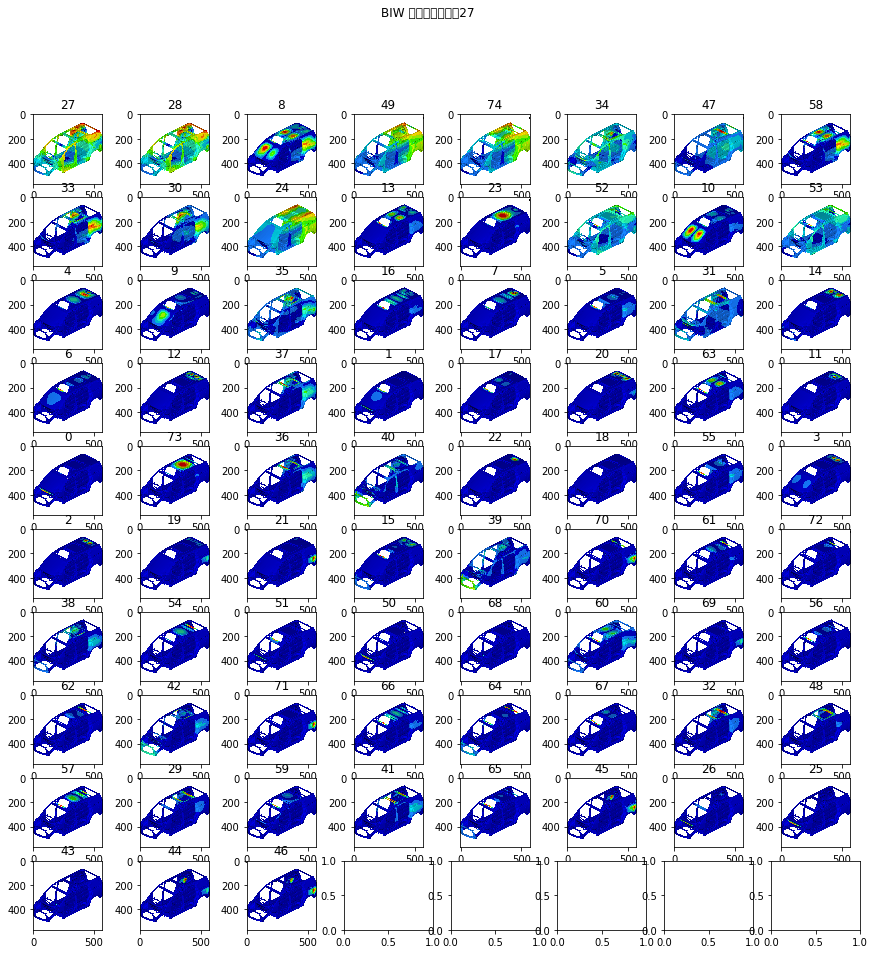

In [37]:
#按照某个排序，然后按照相似度展示
to_find=27

rank_list=list(sim_cos_matrix.sort_values(by=[to_find],ascending=False).index)

Nr=10
Nc=8
fig.size=(15,15)
fig,ax=plt.subplots(Nr,Nc,figsize=(15,15))
fig.suptitle('BIW'+' 按照相似度排列'+str(27))
ax=ax.flatten()

for i in range(Nr*Nc):
    
    ax[i].imshow(pic_list[rank_list[i]])
    ax[i].set_title(rank_list[i])
    
#选取第29张测试整体，第五张测试局部亮色

IndexError: list index out of range

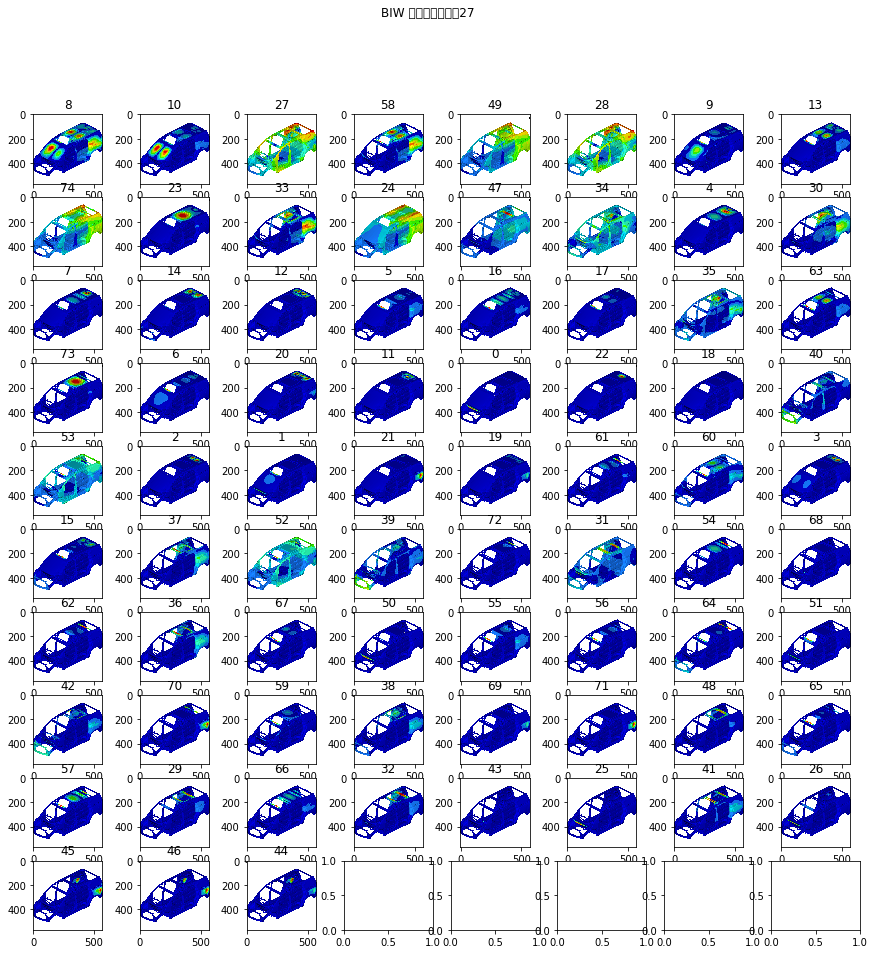

In [38]:
#尝试一下pearson
to_find=8

rank_list=list(sim_pearson_matrix.sort_values(by=[to_find],ascending=False).index)

Nr=10
Nc=8
fig.size=(15,15)
fig,ax=plt.subplots(Nr,Nc,figsize=(15,15))
fig.suptitle('BIW'+' 按照相似度排列'+str(27))
ax=ax.flatten()

for i in range(Nr*Nc):
    
    ax[i].imshow(pic_list[rank_list[i]])
    ax[i].set_title(rank_list[i])


# 提取channel进行展示，看看单个通道直接计算相似度方法

In [1]:
#系统自带提取三个通道的灰度图
b, g, r = cv.split(img)
cv.imshow("Blue 1", b)
cv.imshow("Green 1", g)
cv.imshow("Red 1", r)

NameError: name 'cv' is not defined

In [2]:
def get_red(img):
    redImg = img[:,:,2]
    return redImg
def get_green(img):
    redImg = img[:,:,1]
    return redImg
def get_blue(img):
    redImg = img[:,:,0]
    return redImg